<a href="https://colab.research.google.com/github/rongxie2023/dlcv/blob/main/Chapter02//home/xr/dlcv/Chapter02/Chapter02/10-case4-linear_regression_numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 准备训练数据
dataset_size=120
rdm = np.random.RandomState(1)
X = rdm.rand(dataset_size, 2)
X[:, 0] = 1
noise = np.random.normal(0, 0.05, dataset_size)
Y = (X[:, 1] * 0.5 + noise + 2).reshape(-1, 1)  #y=0.5x+2+noise

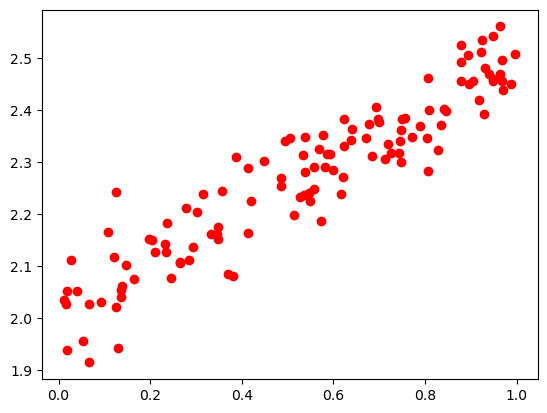

In [3]:
plt.figure()
plt.scatter(x=X[:,1], y=Y, c='r')
plt.show()

In [4]:
#直接根据定义求theta
theta=np.linalg.inv(X.T@X)@X.T@Y
print(theta)

[[2.01230853]
 [0.48267776]]


### 1 整体梯度下降
 请修改下面的学习率，并观察对结果的影响

In [5]:
def gradDescent(X, Y):
    m,n = X.shape
    alpha = 0.00001  #学习率   
    num_epochs = 10000
    weights = np.zeros((n,1))  #权重
    losses=np.zeros([1,num_epochs]) #保存每一次损失值
    for epoch in range(num_epochs):             
        yhat=X @ weights  
        error = yhat - Y    #损失          
        weights = weights - alpha * X.T.dot(error)  #更新梯度
        losses[0,epoch]=np.sum(error**2)
    return weights,losses

In [6]:
weights,losses=gradDescent(X,Y)
print(weights)

[[1.87993131]
 [0.71238978]]


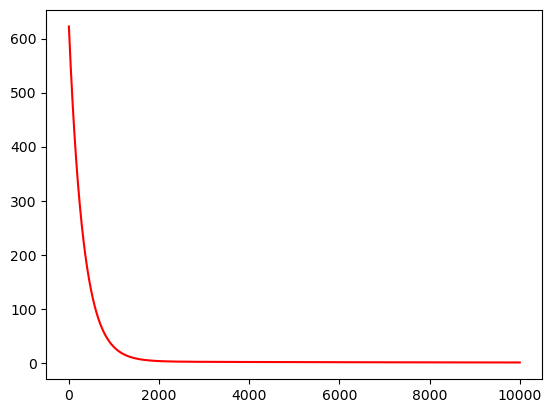

In [7]:
plt.figure()
plt.plot(np.arange(0,losses.shape[1]), losses[0,:], c='r')
plt.show()

### 2 动画效果

In [8]:
%matplotlib inline
from IPython import display

def gradDescentWithRealtimePlot(X, Y):
    m,n = X.shape
    alpha = 0.0001
    num_epochs = 5000
    weights = np.zeros((n,1))
    losses=np.zeros([1,num_epochs])

    for epoch in range(num_epochs):              
        yhat=X.dot(weights)
        error = Y-yhat              
        weights = weights + alpha * X.T.dot(error)
        losses[0,epoch]=np.sum(error**2)
        if epoch%100==0 :
            plt.figure()
            plt.subplot(2,1,1)
            plt.scatter(x=X[:,1], y=Y, c='r')
            xx=np.array([[1,0],[1,1]])
            yy=xx.dot(np.array([[2],[0.5]]))
            plt.plot([0,1],yy,"g-")
            xx=np.array([[1,0],[1,1]])
            yy=xx.dot(weights)
            plt.subplot(2,1,1)
            plt.title('data y=%g+%g*x'%(weights[0],weights[1]))
            ln,=plt.plot([0,1],yy,"b-")
            plt.subplot(2,1,2)
            plt.plot(np.arange(0,epoch), losses[0,:epoch], c='r')
            plt.pause(0.2)   #暂停0.2秒
            display.clear_output(wait=True)
    return weights,losses

#在jupyter显示动画，参考：https://www.jb51.net/article/185239.htm
#关键是以下几句话：
#from IPython import display
#需要刷新的地方，画完图之后添加
#display.clear_output(wait=True)

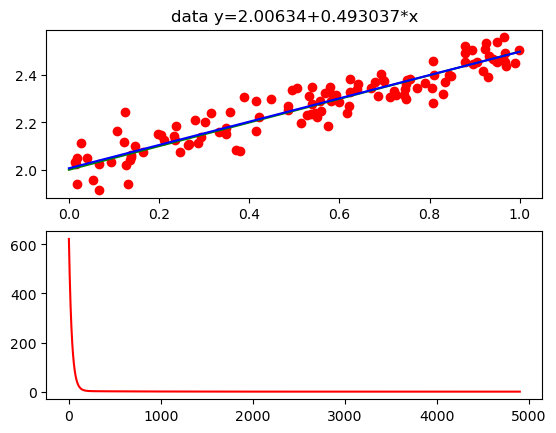

In [9]:
ww,losses=gradDescentWithRealtimePlot(X,Y)

### 3 随机梯度下降
注意观察损失值变化

In [10]:
import random

def stocGradAscent(X, Y):
    m,n = X.shape

    num_examples = m  # 数据量
    batch_size = 10  # 学习批次的大小

    alpha = 0.000002
    num_epochs = 6000
    weights = np.zeros((n,1))
    losses=np.zeros([1,num_epochs])
    for epoch in range(num_epochs): 
        # 将数据打乱
        indices = list(range(num_examples))
        random.shuffle(indices)
        # 每次取出
        for i in range(0, num_examples, batch_size):
            batch_indices = np.array( indices[i: min(i + batch_size, num_examples)] )
            XX=X[batch_indices]
            YY=Y[batch_indices]

            yhat=XX.dot(weights)
            error = YY-yhat   
            weights = weights + alpha * XX.T.dot(error)
            losses[0,epoch]=np.sum(error**2)

    print(weights)
    return weights,losses

[[1.4854185 ]
 [0.79448302]]


/tmp/ipykernel_961214/2697163436.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title('data y=%g+%g*x'%(ww[0],ww[1]))


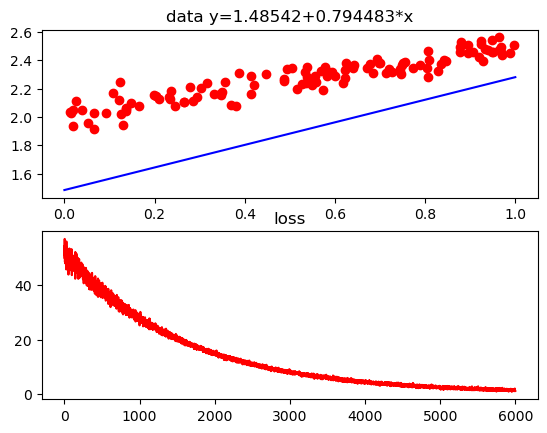

In [11]:
ww,losses=stocGradAscent(X,Y)
x=np.array([[1,0],[1,1]])
yhat=x @ ww
plt.figure()
plt.subplot(2,1,1)
plt.title('data y=%g+%g*x'%(ww[0],ww[1]))
plt.scatter(x=X[:,1], y=Y, c='r')
plt.plot([0,1],yhat,"b-")

plt.subplot(2,1,2)
plt.title('loss')
plt.plot(np.arange(0,losses.shape[1]), losses[0,:], c='r')

plt.show()
